# Wav2Vec2 training

Inspect the loss values during the training

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#log = "wav2vec_logs/wav2vec2_mustc_50000.json" # first attempt
#log = "wav2vec_logs/wav2vec2_complete_60000.json" # first attempt

#log = "wav2vec_logs/wav2vec2_mustc_10000_fix.json" # Fix, max len 400,000, mustc
log = "wav2vec_logs/wav2vec2_mustc_23000_fix.json" # Fix, max len 400,000, mustc, continue ..._10000_fix.json
#log = "wav2vec_logs/wav2vec2_complete_20000_fix.json" # Fix, max len 400,000, test on mustc
#log = "wav2vec_logs/wav2vec2_complete_33000_fix.json"
with open(log) as f:
    d = json.load(f)
    
# baseline error (400,000): wer 25.45% cer 13.68%

In [10]:
total_steps = d["max_steps"]
steps = d["global_step"]

total_epochs = d["num_train_epochs"]
epochs = d["epoch"]

print(f"Steps completed: {steps}/{total_steps} | {steps / total_steps * 100 :.2f}%")
print(f"Epochs completed: {epochs:.2f}/{total_epochs} | {epochs / total_epochs * 100 :.2f}%")

Steps completed: 23000/100000 | 23.00%
Epochs completed: 12.06/13 | 92.76%


In [11]:
loss = pd.DataFrame(columns=["step", "loss", "eval_loss"]).set_index("step")
wer = pd.DataFrame(columns=["step", "eval_wer", "eval_cer"]).set_index("step")
history = d["log_history"]

for i in history:
    if "loss" in i:
        loss.loc[i["step"], "loss"] = i["loss"]
    if "eval_loss" in i:
        loss.loc[i["step"], "eval_loss"] = i["eval_loss"]
    if "eval_wer" in i:
        wer.loc[i["step"], "eval_wer"] = i["eval_wer"]
    if "eval_cer" in i:
        wer.loc[i["step"], "eval_cer"] = i["eval_cer"]

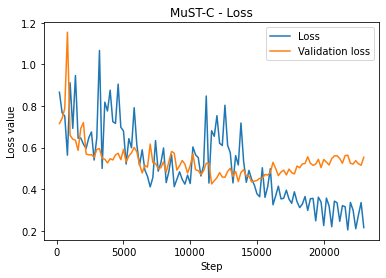

In [14]:
#loss.plot()
plt.plot(loss["loss"].dropna(), label="Loss")
plt.plot(loss["eval_loss"].dropna(), label="Validation loss")

#plt.title("TED+MuST-C - Loss")
plt.title("MuST-C - Loss")

plt.xlabel("Step")
plt.ylabel("Loss value")
plt.legend()
plt.show()

Text(0, 0.5, 'Error rate [0,1]')

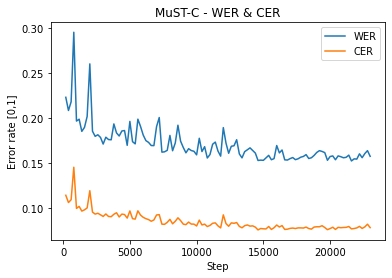

In [15]:
wer.plot()

#plt.title("TED+MuST-C - WER & CER")
plt.title("MuST-C - WER & CER")

plt.legend(["WER", "CER"])
plt.xlabel("Step")
plt.ylabel("Error rate [0,1]")

In [7]:
loss

,loss,eval_loss
step,,
200,2.2079,0.769616
400,1.4754,0.769398
600,1.3614,0.681115
800,1.1596,0.656133
1000,0.9858,0.600761
...,...,...
32200,0.6805,0.496782
32400,0.5283,0.45362
32600,0.9453,0.447118


In [8]:
wer

,eval_wer,eval_cer
step,,
200,0.363476,0.147005
400,0.23737,0.115609
600,0.278589,0.132045
800,0.308145,0.124476
1000,0.259601,0.112995
...,...,...
32200,0.160387,0.081218
32400,0.162471,0.081319
32600,0.167111,0.081777


In [10]:
at = 33000 # 15000
print(f"Loss at {at}:", loss.loc[at, "loss"])
print(f"Validation loss at {at}:", loss.loc[at, "eval_loss"])
print(f"WER at {at}: {wer.loc[at, 'eval_wer']*100:.2f}")
print(f"CER at {at}: {wer.loc[at, 'eval_cer']*100:.2f}")

Loss at 33000: 0.8639
Validation loss at 33000: 0.5212194919586182
WER at 33000: 23.97
CER at 33000: 10.45


In [11]:
wer.min()

eval_wer    0.15461
eval_cer    0.07677
dtype: object

In [19]:
np.argmin(wer["eval_wer"].tolist())

153

In [20]:
wer.iloc[153]

eval_wer    0.15461
eval_cer    0.07677
Name: 30800, dtype: object